#  Exploring overfitting and underfitting

In [2]:
## import libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


Download the IMDB dataset

In [3]:
NUM_WORDS =10000

(train_data, train_labels),(test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


def multi_hot_sequences(sequences,dimension):
    ## Create an all - zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i , word_indices in enumerate(sequences):
        results[i,word_indices]= 1.0 #set specific indices of results[i] to 1s
    return results


Multi hot sequences will turn the lists into vectors of 0s and 1s. For example, the sequence [3,5] will be turned into a 10000-dim vector that would be all zeros except for indices 3 and 5

In [4]:
train_data = multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data= multi_hot_sequences(test_data,dimension=NUM_WORDS)

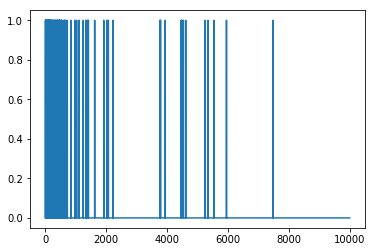

In [5]:
# resulting multi-hot vectors
plt.plot(train_data[0])

In [6]:
print(train_data)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


# Demonstrate overfitting

In [7]:
#Create a baseline model


In [8]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(10000,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history= baseline_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data= (test_data,test_labels),
                                     verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.5012 - acc: 0.8068 - binary_crossentropy: 0.5012 - val_loss: 0.3498 - val_acc: 0.8746 - val_binary_crossentropy: 0.3498
Epoch 2/20
 - 7s - loss: 0.2577 - acc: 0.9089 - binary_crossentropy: 0.2577 - val_loss: 0.2851 - val_acc: 0.8872 - val_binary_crossentropy: 0.2851
Epoch 3/20
 - 6s - loss: 0.1866 - acc: 0.9354 - binary_crossentropy: 0.1866 - val_loss: 0.2869 - val_acc: 0.8866 - val_binary_crossentropy: 0.2869
Epoch 4/20
 - 6s - loss: 0.1487 - acc: 0.9497 - binary_crossentropy: 0.1487 - val_loss: 0.3120 - val_acc: 0.8802 - val_binary_crossentropy: 0.3120
Epoch 5/20
 - 7s - loss: 0.1233 - acc: 0.9591 - binary_crossentropy: 0.1233 - val_loss: 0.3364 - val_acc: 0.8759 - val_binary_crossentropy: 0.3364
Epoch 6/20
 - 8s - loss: 0.1027 - acc: 0.9684 - binary_crossentropy: 0.1027 - val_loss: 0.3665 - val_acc: 0.8716 - val_binary_crossentropy: 0.3665
Epoch 7/20
 - 7s - loss: 0.0866 - acc: 0.9744 - binary_crossentropy:

Let's create a smaller model with less hidden units compared to baseline model we just created


In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4,activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
# train the model with the same data

In [12]:
smaller_history= smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data= (test_data,test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5984 - acc: 0.6547 - binary_crossentropy: 0.5984 - val_loss: 0.5370 - val_acc: 0.7747 - val_binary_crossentropy: 0.5370
Epoch 2/20
 - 6s - loss: 0.4888 - acc: 0.8423 - binary_crossentropy: 0.4888 - val_loss: 0.4876 - val_acc: 0.8507 - val_binary_crossentropy: 0.4876
Epoch 3/20
 - 6s - loss: 0.4395 - acc: 0.8933 - binary_crossentropy: 0.4395 - val_loss: 0.4628 - val_acc: 0.8659 - val_binary_crossentropy: 0.4628
Epoch 4/20
 - 5s - loss: 0.4048 - acc: 0.9193 - binary_crossentropy: 0.4048 - val_loss: 0.4497 - val_acc: 0.8663 - val_binary_crossentropy: 0.4497
Epoch 5/20
 - 6s - loss: 0.3769 - acc: 0.9362 - binary_crossentropy: 0.3769 - val_loss: 0.4458 - val_acc: 0.8636 - val_binary_crossentropy: 0.4458
Epoch 6/20
 - 5s - loss: 0.3531 - acc: 0.9503 - binary_crossentropy: 0.3531 - val_loss: 0.4399 - val_acc: 0.8674 - val_binary_crossentropy: 0.4399
Epoch 7/20
 - 5s - loss: 0.3324 - acc: 0.9583 - binary_crossentropy:

Create a bigger model

In [14]:
## this will show us how more parameters leads to overfitting so 
# quickly

In [15]:
bigger_model=keras.models.Sequential([
    keras.layers.Dense(512,activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
## again train using the same data


In [18]:
bigger_history=bigger_model.fit(train_data,train_labels, epochs=20,
                               batch_size=512,
                               validation_data=(test_data,test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 22s - loss: 0.3401 - acc: 0.8563 - binary_crossentropy: 0.3401 - val_loss: 0.2906 - val_acc: 0.8826 - val_binary_crossentropy: 0.2906
Epoch 2/20
 - 23s - loss: 0.1310 - acc: 0.9528 - binary_crossentropy: 0.1310 - val_loss: 0.3615 - val_acc: 0.8634 - val_binary_crossentropy: 0.3615
Epoch 3/20
 - 24s - loss: 0.0383 - acc: 0.9887 - binary_crossentropy: 0.0383 - val_loss: 0.4473 - val_acc: 0.8681 - val_binary_crossentropy: 0.4473
Epoch 4/20
 - 23s - loss: 0.0068 - acc: 0.9993 - binary_crossentropy: 0.0068 - val_loss: 0.6082 - val_acc: 0.8688 - val_binary_crossentropy: 0.6082
Epoch 5/20
 - 23s - loss: 9.9497e-04 - acc: 0.9999 - binary_crossentropy: 9.9497e-04 - val_loss: 0.6891 - val_acc: 0.8710 - val_binary_crossentropy: 0.6891
Epoch 6/20
 - 23s - loss: 2.2697e-04 - acc: 1.0000 - binary_crossentropy: 2.2697e-04 - val_loss: 0.7306 - val_acc: 0.8708 - val_binary_crossentropy: 0.7306
Epoch 7/20
 - 32s - loss: 1.3319e-04 - acc: 1.

# #Plot the training and validation loss

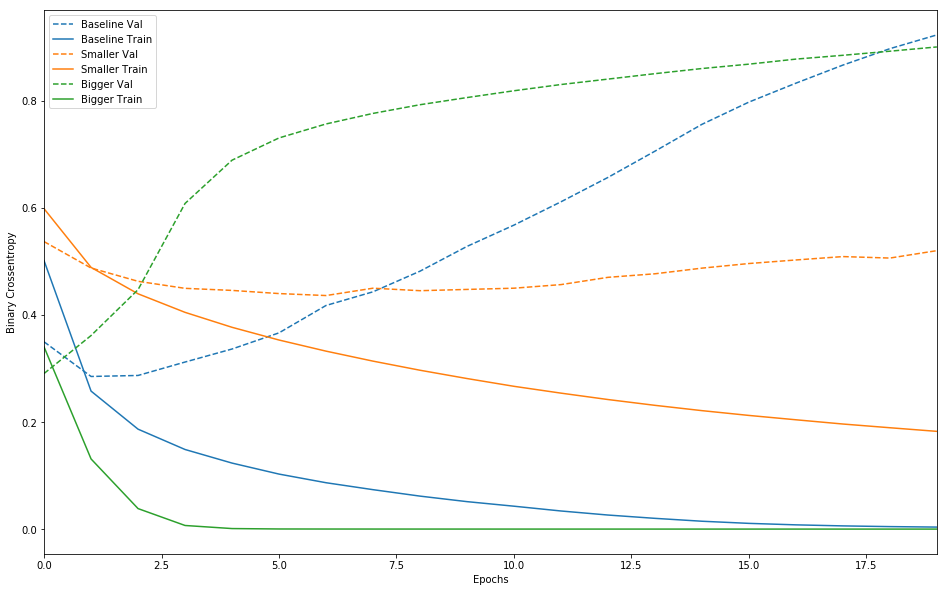

In [21]:
def plot_history(histories,key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name,history in histories:
        val = plt.plot(history.epoch,history.history['val_'+key],
                      '--',label=name.title()+' Val')
        
        plt.plot(history.epoch, history.history[key],color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
        
    plt.xlim([0,max(history.epoch)])
plot_history([('baseline',baseline_history),
                     ('smaller',smaller_history),
                     ('bigger',bigger_history)])
        

# Strategies to avoid overfitting

In [22]:
## Add weight regularization

In [25]:
## L1 regularization: cost added is proportional to absolute
## value of the weights coefficient


## L2 regularization: cost added is proportional to the square of 
## the value of the weights coefficients.

## we are using L2 regularization

In [32]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy','binary_crossentropy'])

l2_model_history=l2_model.fit(train_data,train_labels,
                             epochs=20,
                             batch_size=512,
                             validation_data=(test_data,test_labels),
                              verbose=2)



Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5257 - acc: 0.8005 - binary_crossentropy: 0.4864 - val_loss: 0.3790 - val_acc: 0.8796 - val_binary_crossentropy: 0.3384
Epoch 2/20
 - 5s - loss: 0.3008 - acc: 0.9116 - binary_crossentropy: 0.2557 - val_loss: 0.3347 - val_acc: 0.8864 - val_binary_crossentropy: 0.2864
Epoch 3/20
 - 6s - loss: 0.2494 - acc: 0.9310 - binary_crossentropy: 0.1987 - val_loss: 0.3384 - val_acc: 0.8858 - val_binary_crossentropy: 0.2858
Epoch 4/20
 - 6s - loss: 0.2234 - acc: 0.9418 - binary_crossentropy: 0.1692 - val_loss: 0.3522 - val_acc: 0.8816 - val_binary_crossentropy: 0.2967
Epoch 5/20
 - 6s - loss: 0.2099 - acc: 0.9490 - binary_crossentropy: 0.1529 - val_loss: 0.3659 - val_acc: 0.8791 - val_binary_crossentropy: 0.3079
Epoch 6/20
 - 6s - loss: 0.1968 - acc: 0.9537 - binary_crossentropy: 0.1380 - val_loss: 0.3849 - val_acc: 0.8746 - val_binary_crossentropy: 0.3256
Epoch 7/20
 - 5s - loss: 0.1893 - acc: 0.9569 - binary_crossentropy:

# Add Dropout

In [33]:
## let's add 2 dropout layers

In [34]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])
dpt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [35]:
dpt_model_history=dpt_model.fit(train_data,train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data,test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.6404 - acc: 0.6150 - binary_crossentropy: 0.6404 - val_loss: 0.5285 - val_acc: 0.8528 - val_binary_crossentropy: 0.5285
Epoch 2/20
 - 5s - loss: 0.5027 - acc: 0.7816 - binary_crossentropy: 0.5027 - val_loss: 0.3953 - val_acc: 0.8786 - val_binary_crossentropy: 0.3953
Epoch 3/20
 - 5s - loss: 0.4006 - acc: 0.8558 - binary_crossentropy: 0.4006 - val_loss: 0.3300 - val_acc: 0.8888 - val_binary_crossentropy: 0.3300
Epoch 4/20
 - 6s - loss: 0.3382 - acc: 0.8906 - binary_crossentropy: 0.3382 - val_loss: 0.2987 - val_acc: 0.8899 - val_binary_crossentropy: 0.2987
Epoch 5/20
 - 6s - loss: 0.2888 - acc: 0.9098 - binary_crossentropy: 0.2888 - val_loss: 0.2849 - val_acc: 0.8886 - val_binary_crossentropy: 0.2849
Epoch 6/20
 - 6s - loss: 0.2483 - acc: 0.9245 - binary_crossentropy: 0.2483 - val_loss: 0.2942 - val_acc: 0.8865 - val_binary_crossentropy: 0.2942
Epoch 7/20
 - 6s - loss: 0.2212 - acc: 0.9330 - binary_crossentropy:

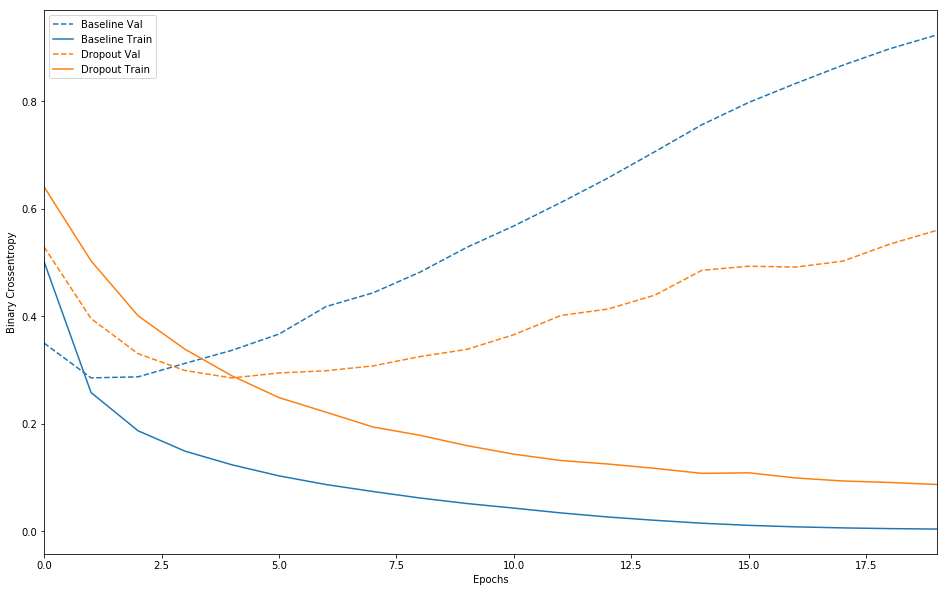

In [36]:
plot_history([('baseline',baseline_history),
             ('dropout',dpt_model_history)])

Recap: To prevent overfitting in neural networks:
    * Get more training data
    * Reduce the capcity of the network
    * Add weight regularization
    * Add dropout